<a href="https://colab.research.google.com/github/mariamorgana/datasharing/blob/master/IPD_Maria_Tavares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONSUMO DE ÁLCOOL POR ESTUDANTES**

Dados sociais, de gênero e de estudo de estudantes do curso de matemática do ensino médio.

* foram selecionadas 13 variáveis das 33 variáveis contidas no dataset para melhor gerenciamento do tempo da apresentação.


In [2]:
import pandas as pd
data = pd.read_excel('/content/student-mat.xlsx')

# Remoção duplicados
data.drop_duplicates(inplace=True)

#impressão das dimensões do dataset (linhas, colunas)
print(data.shape)

# nome dos campos (colunas)
print(data.columns)

# primeiras 5 linhas
data.head(5)

(395, 13)
Index(['school', 'sex', 'age', 'Medu', 'Fedu', 'studytime', 'higher',
       'internet', 'famrel', 'freetime', 'Walc', 'absences', 'G3'],
      dtype='object')


,school,sex,age,Medu,Fedu,studytime,higher,internet,famrel,freetime,Walc,absences,G3
0,GP,F,18,4,4,2,yes,no,4,3,1,6,6
1,GP,F,17,1,1,2,yes,yes,5,3,1,4,6
2,GP,F,15,1,1,2,yes,yes,4,3,3,10,10
3,GP,F,15,4,2,3,yes,yes,3,2,1,2,15
4,GP,F,16,3,3,2,yes,no,4,3,2,4,10


O dataset contém dados de 13 variáveis (colunas) de 395 estudantes (linhas).
As variáveis analisadas neste trabalho serão:

1.   school: escola do aluno (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
2.   sex: sexo - sexo do aluno (binário: 'F' - feminino ou 'M' - masculino)
3. age: idade do estudante (numérico, de 15 a 22)
4. Medu - escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio ou 4 - ensino superior)
5. Fadu - escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio ou 4 - ensino superior)
6. studytime - tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas ou 4 - >10 horas)
7. higher - quer fazer ensino superior (binário: sim ou não)
8. internet - acesso à Internet em casa (binário: sim ou não)
9. famrel - qualidade das relações familiares (numérico: de 1 - péssimo a 5 - excelente)
10. freetime - tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
11. Walc - consumo de álcool no final de semana (numérico: de 1 - muito baixo a 5 - muito alto)
12. absences - número de faltas escolares (numérico: de 0 a 93)
13. G3 - nota final (numérico: de 0 a 20, meta de saída)






O dataset

O objetivo desta análise será avaliar se há diferença entre as características dos estudantes de acordo com o consumo de álccol.
Para realizar a análise, iremos utilizar a variácl Walc como numérica e categórica. O consumo de álcool será categorizado em baixo (1 e 2) e médio/alto (3 a 5).

In [3]:
faixas = [0, 3, 5]
categorias = ["baixo", "medio/alto"]
data["Walc_cat"] = pd.cut(data["Walc"], bins=faixas, labels=categorias)
data.head()


,school,sex,age,Medu,Fedu,studytime,higher,internet,famrel,freetime,Walc,absences,G3,Walc_cat
0,GP,F,18,4,4,2,yes,no,4,3,1,6,6,baixo
1,GP,F,17,1,1,2,yes,yes,5,3,1,4,6,baixo
2,GP,F,15,1,1,2,yes,yes,4,3,3,10,10,baixo
3,GP,F,15,4,2,3,yes,yes,3,2,1,2,15,baixo
4,GP,F,16,3,3,2,yes,no,4,3,2,4,10,baixo


In [4]:
# Transformando as variáveis string em categóricas utilizando biblioteca sklearn
# Outra forma de modificar seria utilizar a função map, mas teria que fazer coluna a coluna.

from sklearn.preprocessing import LabelEncoder

categorica = [ 'school', 'sex',  'higher', 'internet', 'Walc_cat']

label_encoder = LabelEncoder()
for column in categorica:
    data[column] = label_encoder.fit_transform(data[column])

In [5]:
# Checando se as variáveis strings foram convertidas em categóricas
data.head()


,school,sex,age,Medu,Fedu,studytime,higher,internet,famrel,freetime,Walc,absences,G3,Walc_cat
0,0,0,18,4,4,2,1,0,4,3,1,6,6,0
1,0,0,17,1,1,2,1,1,5,3,1,4,6,0
2,0,0,15,1,1,2,1,1,4,3,3,10,10,0
3,0,0,15,4,2,3,1,1,3,2,1,2,15,0
4,0,0,16,3,3,2,1,0,4,3,2,4,10,0


In [6]:
# Checando se há missing values.

data.isna().sum()

#Não há missing values no dataset.

,0
school,0
sex,0
age,0
Medu,0
Fedu,0
studytime,0
higher,0
internet,0
famrel,0
freetime,0


In [7]:
# Primeiro, irei selecionar do dataset apenas as colunas das variáveis numéricas.

data_num = data.iloc[:, [2,3,4,5,8,9,10,11,12,13]]
data_num.head(3)

,age,Medu,Fedu,studytime,famrel,freetime,Walc,absences,G3,Walc_cat
0,18,4,4,2,4,3,1,6,6,0
1,17,1,1,2,5,3,1,4,6,0
2,15,1,1,2,4,3,3,10,10,0


In [27]:
data_num.describe()

,age,Medu,Fedu,studytime,famrel,freetime,Walc,absences,G3,Walc_cat
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,3.944304,3.235443,2.291139,5.708861,10.415190,0.200000
std,1.276043,1.094735,1.088201,0.839240,0.896659,0.998862,1.287897,8.003096,4.581443,0.400507
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,4.000000,3.000000,1.000000,0.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,4.000000,11.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,5.000000,4.000000,3.000000,8.000000,14.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000,1.000000


A média e mediana de idade dos estudantes foi de 17 anos, e metade deles tinham entre 16 e 18 anos.
Apenas 25% dos pais tinha nível médio, já entre as mães, metade tinha ensino médio.
O tempo médio de estudo semanal foi de 2 horas.
A qualidade de relacionamento familiar foi considerada de boa a excelente pela maioria dos estudantes.
O consumo de álcool semanal foi alto ou muito alto em 25% do estudantes.
A média final foi 10,5, sendo que a média máxima é 20.


In [8]:
data_cat = data.iloc[:, [0,1,6,7,13]]
data_cat.head(3)

,school,sex,higher,internet,Walc_cat
0,0,0,1,0,0
1,0,0,1,1,0
2,0,0,1,1,0


In [9]:
# prompt: count percentual of data_cat

for column in data_cat:
   print(round(data_cat[column].value_counts(normalize=True),2)*100,2)
   print()



school
0    88.0
1    12.0
Name: proportion, dtype: float64 2

sex
0    53.0
1    47.0
Name: proportion, dtype: float64 2

higher
1    95.0
0     5.0
Name: proportion, dtype: float64 2

internet
1    83.0
0    17.0
Name: proportion, dtype: float64 2

Walc_cat
0    80.0
1    20.0
Name: proportion, dtype: float64 2



In [10]:
for column in data_cat:
   print(round(data_cat[column].value_counts()))
   print()

school
0    349
1     46
Name: count, dtype: int64

sex
0    208
1    187
Name: count, dtype: int64

higher
1    375
0     20
Name: count, dtype: int64

internet
1    329
0     66
Name: count, dtype: int64

Walc_cat
0    316
1     79
Name: count, dtype: int64



 A maioria dos estudantes são da escola Gabriel Pereira (349, 88%).
 Houve maior número de mulheres (208, 53%).
 Apenas 20 (5%) estudantes não pretendem cursar o ensino superior.
 Quase um quinto dos estudantes (66, 17%) não tem acesso a internet em casa.

In [11]:
for column in data_cat:
  data_res_n= pd.crosstab(data_cat[column], data_cat['Walc_cat'])
  print(data_res_n)

Walc_cat    0   1
school           
0         278  71
1          38   8
Walc_cat    0   1
sex              
0         190  18
1         126  61
Walc_cat    0   1
higher           
0          12   8
1         304  71
Walc_cat    0   1
internet         
0          53  13
1         263  66
Walc_cat    0   1
Walc_cat         
0         316   0
1           0  79


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data_cat:
  data_res= pd.crosstab(data_cat[column], data_cat['Walc_cat'], normalize='columns').round(2)
  print(data_res)

Walc_cat     0    1
school             
0         0.88  0.9
1         0.12  0.1
Walc_cat    0     1
sex                
0         0.6  0.23
1         0.4  0.77
Walc_cat     0    1
higher             
0         0.04  0.1
1         0.96  0.9
Walc_cat     0     1
internet            
0         0.17  0.16
1         0.83  0.84
Walc_cat    0    1
Walc_cat          
0         1.0  0.0
1         0.0  1.0


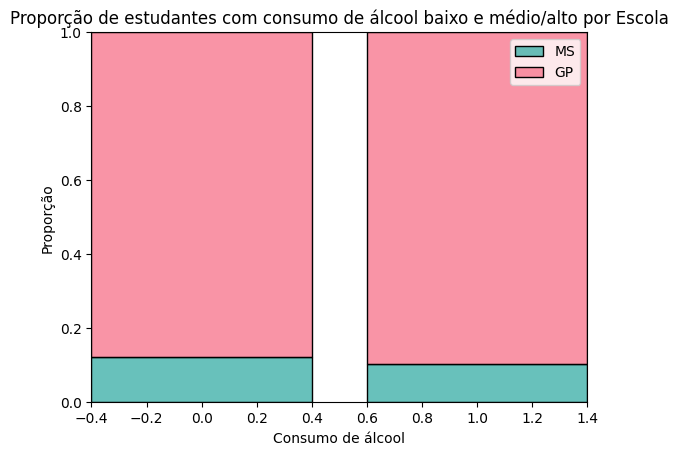

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sc = sns.histplot(
    data=data_cat,
    x='Walc_cat', hue=data_cat['school'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=0.8,
    palette= 'husl'
).set(title='Proporção de estudantes com consumo de álcool baixo e médio/alto por Escola')
plt.legend(['MS', 'GP'])
plt.xlabel('Consumo de álcool')
plt.ylabel('Proporção')
plt.show()

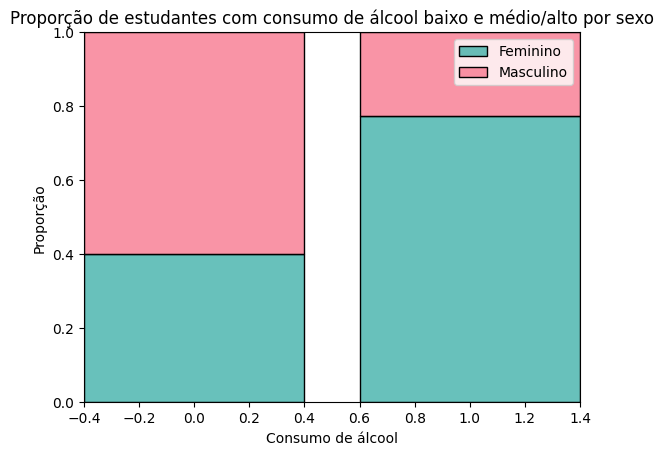

In [14]:
%matplotlib inline

sns.histplot(
    data=data_cat,
    x='Walc_cat', hue=data_cat['sex'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8,
    palette= 'husl'
).set(title='Proporção de estudantes com consumo de álcool baixo e médio/alto por sexo')
plt.xlabel('Consumo de álcool')
plt.ylabel('Proporção')
plt.legend(['Feminino', 'Masculino']);
plt.show()

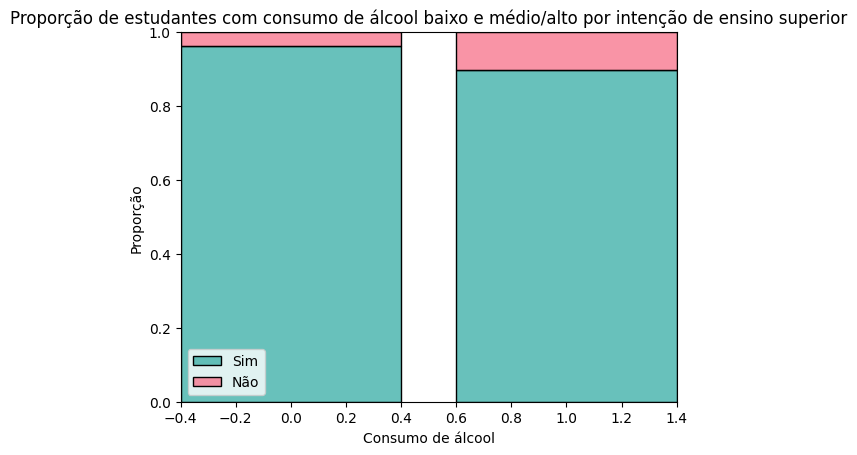

In [17]:
sns.histplot(
    data=data_cat,
    x='Walc_cat', hue=data_cat['higher'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8,
    palette= 'husl'
).set(title='Proporção de estudantes com consumo de álcool baixo e médio/alto por intenção de ensino superior')
plt.xlabel('Consumo de álcool')
plt.ylabel('Proporção')
plt.legend(['Sim', 'Não'])
plt.show()

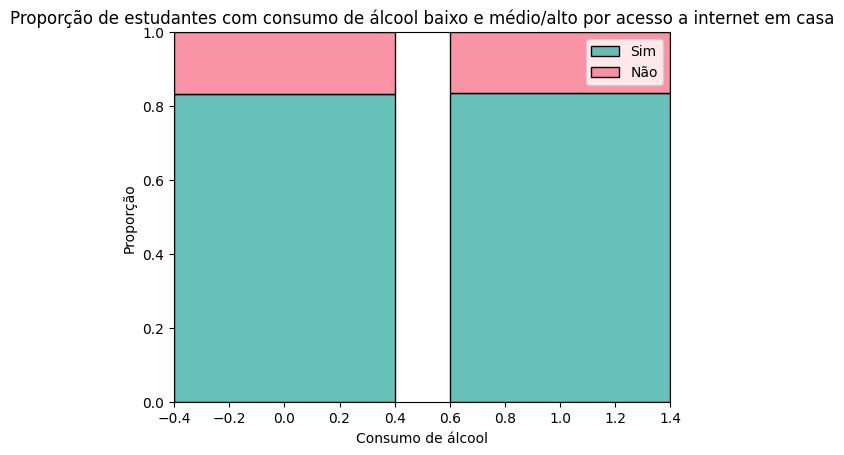

In [18]:
sns.histplot(
    data=data_cat,
    x='Walc_cat', hue=data_cat['internet'],
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8,
    palette= 'husl'
).set(title='Proporção de estudantes com consumo de álcool baixo e médio/alto por acesso a internet em casa')
plt.xlabel('Consumo de álcool')
plt.ylabel('Proporção')
plt.legend(['Sim', 'Não'])
plt.show()

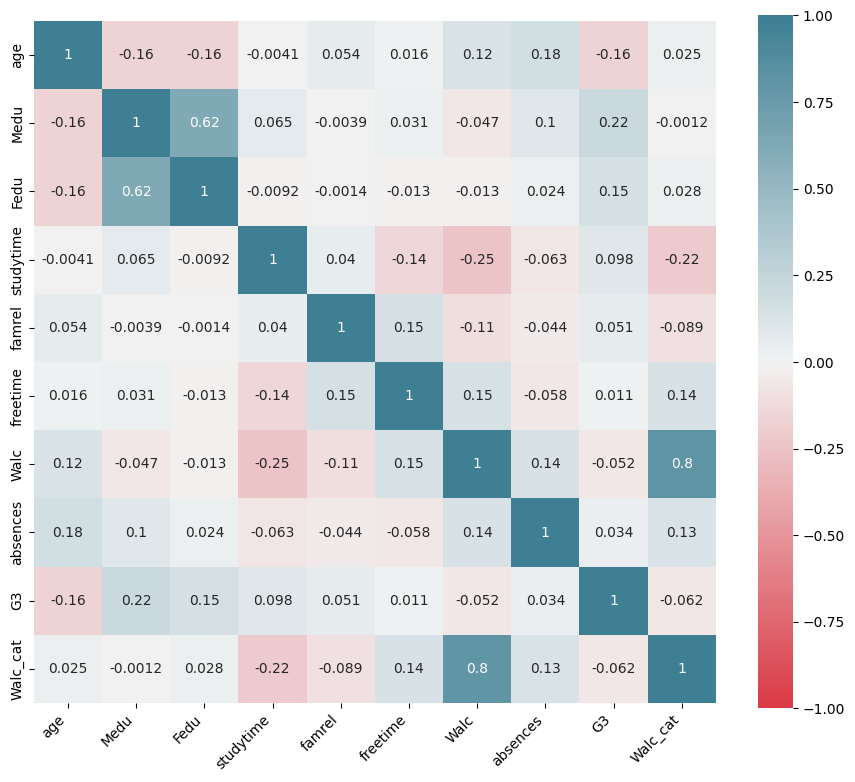

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_num.corr()
f, ax = plt.subplots(figsize=(11, 9))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True,
    annot= True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Na análise de correlação apresentada no heatmap, não observamos correlação forte entre o consumo de álcool semanal e as outras variáveis numéricas.

In [20]:
# Sumarizando as variáveis numéricas com o comando describe
colum = ['age', 'Medu', 'Fedu','studytime', 'famrel', 'freetime', 'absences','G3']
data_sum = data_num.groupby('Walc_cat')[colum].describe().applymap(lambda x: f"{x:0.2f}")
data_sum

<ipython-input-20-b37fc7292a7b>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_sum = data_num.groupby('Walc_cat')[colum].describe().applymap(lambda x: f"{x:0.2f}")


age                                                    Medu  \
           count   mean   std    min    25%    50%    75%    max   count   
Walc_cat                                                                   
0         316.00  16.68  1.29  15.00  16.00  17.00  18.00  21.00  316.00   
1          79.00  16.76  1.22  15.00  16.00  17.00  18.00  22.00   79.00   

                ... absences             G3                                  \
          mean  ...      75%    max   count   mean   std   min   25%    50%   
Walc_cat        ...                                                           
0         2.75  ...     7.00  75.00  316.00  10.56  4.75  0.00  8.75  11.00   
1         2.75  ...    12.50  54.00   79.00   9.85  3.79  0.00  8.00  10.00   

                        
            75%    max  
Walc_cat                
0         14.00  20.00  
1         12.00  18.00  

[2 rows x 64 columns]

In [21]:
 print(data_sum.shape)

(2, 64)


In [22]:
data_sum = data_sum.stack(future_stack=True)

In [23]:
data_sum

age    Medu    Fedu studytime  famrel freetime absences  \
Walc_cat                                                                     
0        count  316.00  316.00  316.00    316.00  316.00   316.00   316.00   
         mean    16.68    2.75    2.51      2.13    3.98     3.17     5.18   
         std      1.29    1.09    1.09      0.84    0.87     0.99     7.71   
         min     15.00    0.00    0.00      1.00    1.00     1.00     0.00   
         25%     16.00    2.00    2.00      2.00    4.00     3.00     0.00   
         50%     17.00    3.00    2.00      2.00    4.00     3.00     2.50   
         75%     18.00    4.00    3.00      3.00    5.00     4.00     7.00   
         max     21.00    4.00    4.00      4.00    5.00     5.00    75.00   
1        count   79.00   79.00   79.00     79.00   79.00    79.00    79.00   
         mean    16.76    2.75    2.58      1.67    3.78     3.51     7.82   
         std      1.22    1.11    1.08      0.73    0.97     1.00     8.83   
         min     15.00    0.00    1.00      1.00    1.00     1.00     0.00   
         25%     16.00    2.00    2.00      1.00    3.00     3.00     2.00   
         50%     17.00    3.00    3.00      2.00    4.00     4.00     4.00   
         75%     18.00    4.00    4.00      2.00    4.00     4.00    12.50   
         max     22.00    4.00    4.00      4.00    5.00     5.00    54.00   

                    G3  
Walc_cat                
0        count  316.00  
         mean    10.56  
         std      4.75  
         min      0.00  
         25%      8.75  
         50%     11.00  
         75%     14.00  
         max     20.00  
1        count   79.00  
         mean     9.85  
         std      3.79  
         min      0.00  
         25%      8.00  
         50%     10.00  
         75%     12.00  
         max     18.00

[Text(0.5, 0, 'Consumo de álcool'), Text(0, 0.5, 'Tempo de estudo')]

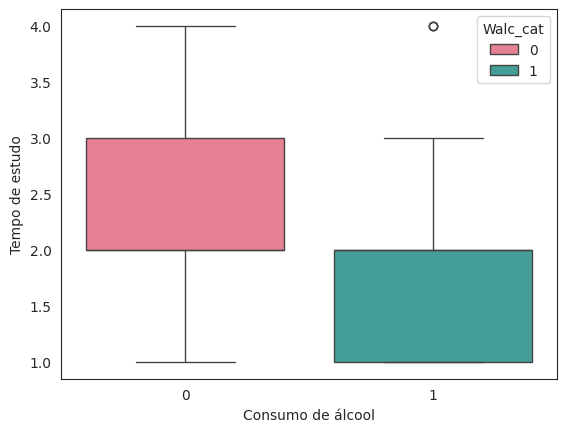

In [24]:
# Criando boxplot do tempo de estudo de acordo com Walc_cat.
sns.set_style("white")
st=sns.boxplot(x='Walc_cat', y='studytime', hue='Walc_cat', palette= 'husl', data=data_num)
st.set(xlabel ="Consumo de álcool", ylabel = "Tempo de estudo")



[Text(0.5, 0, 'Consumo de álcool'), Text(0, 0.5, 'Faltas')]

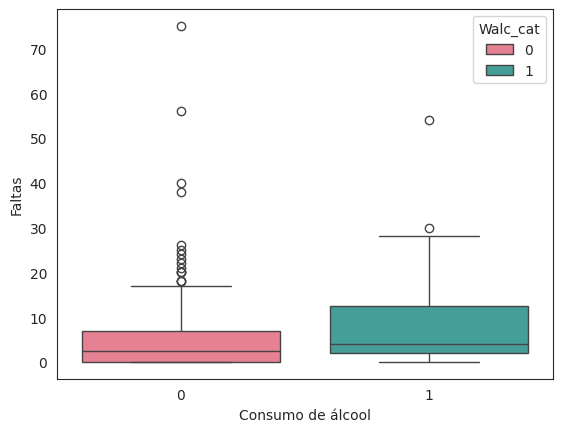

In [25]:
# Criando boxplot do número de faltas de acordo com Walc_cat.
sns.set_style("white")
ft=sns.boxplot(x='Walc_cat', y='absences', hue='Walc_cat', palette= 'husl', data=data_num)
ft.set(xlabel ="Consumo de álcool", ylabel = "Faltas")

[Text(0.5, 0, 'Consumo de álcool'), Text(0, 0.5, 'Nota final')]

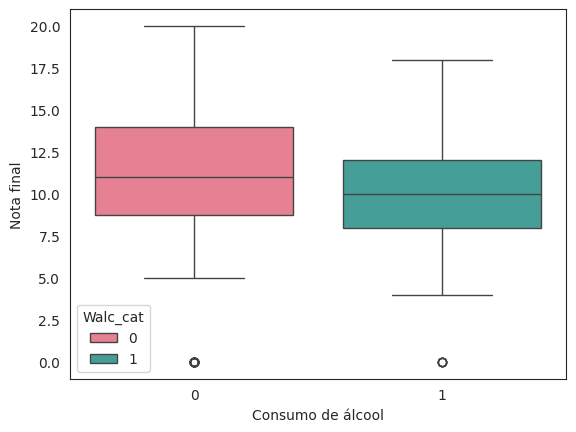

In [26]:
# Criando boxplot da nota final de acordo com Walc_cat.
sns.set_style("white")
G3=sns.boxplot(x='Walc_cat', y='G3', hue='Walc_cat', palette= 'husl', data=data_num)
G3.set(xlabel ="Consumo de álcool", ylabel = "Nota final")

Nesta análise de 395 estudantes da disciplina de matemática no ensino médio, concluímos que há uma maior proporção de homens entre os estudantes que tem consumo de álccol semanal considerado médio/alto, e um menor número destes estudantes pretendem ingressar no ensino superior.
O Consumo de álccol médio/alto foi associado a um menor tempo de estudo semanal, maior número de faltas e menor nota final na disciplina de matemática.